Author: Smridhi Mangla
*   Reference: https://mesonet.agron.iastate.edu/request/download.phtml?network=CT_ASOS

# Data Preparation


In [64]:
#load file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [66]:
#load airport weather dataset
df_airport_weather = pd.read_csv("/content/drive/My Drive/Data Science with Python Spring2020/week4_12feb2020/assignment_extra_credit/BDL_Jan2019.csv")
df_airport_weather.shape

(9122, 31)

In [67]:
#subset the data
df_subset=df_airport_weather[['station','valid','lon','lat','tmpf','dwpf','sknt','relh','drct','p01i','alti','mslp','gust']].copy()
df_subset

,station,valid,lon,lat,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp,gust
0,BDL,1/1/2019 0:00,-72.6825,41.9381,M,M,5,M,110,0.01,30.17,M,M
1,BDL,1/1/2019 0:05,-72.6825,41.9381,M,M,4,M,120,0.01,30.16,M,M
2,BDL,1/1/2019 0:10,-72.6825,41.9381,M,M,4,M,110,0.02,30.16,M,M
3,BDL,1/1/2019 0:15,-72.6825,41.9381,M,M,3,M,110,0.03,30.16,M,M
4,BDL,1/1/2019 0:20,-72.6825,41.9381,M,M,3,M,100,0.04,30.15,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9117,BDL,1/30/2019 23:40,-72.6825,41.9381,M,M,18,M,260,M,29.87,M,M
9118,BDL,1/30/2019 23:45,-72.6825,41.9381,M,M,19,M,260,M,29.88,M,M
9119,BDL,1/30/2019 23:50,-72.6825,41.9381,M,M,23,M,260,M,29.89,M,M
9120,BDL,1/30/2019 23:51,-72.6825,41.9381,16,5,23,61.23,270,T,29.89,1012.3,31


# Data Preprocessing

In [68]:
#Cleaning up the tmpf, sknt and dwpf columns ‘M’/'T' counts as NA values
df_subset=df_subset.replace('M',np.nan)
df_subset=df_subset.replace('T',np.nan)
df_subset.isna

<bound method DataFrame.isna of      station            valid      lon      lat  ...  p01i   alti    mslp gust
0        BDL    1/1/2019 0:00 -72.6825  41.9381  ...  0.01  30.17     NaN  NaN
1        BDL    1/1/2019 0:05 -72.6825  41.9381  ...  0.01  30.16     NaN  NaN
2        BDL    1/1/2019 0:10 -72.6825  41.9381  ...  0.02  30.16     NaN  NaN
3        BDL    1/1/2019 0:15 -72.6825  41.9381  ...  0.03  30.16     NaN  NaN
4        BDL    1/1/2019 0:20 -72.6825  41.9381  ...  0.04  30.15     NaN  NaN
...      ...              ...      ...      ...  ...   ...    ...     ...  ...
9117     BDL  1/30/2019 23:40 -72.6825  41.9381  ...   NaN  29.87     NaN  NaN
9118     BDL  1/30/2019 23:45 -72.6825  41.9381  ...   NaN  29.88     NaN  NaN
9119     BDL  1/30/2019 23:50 -72.6825  41.9381  ...   NaN  29.89     NaN  NaN
9120     BDL  1/30/2019 23:51 -72.6825  41.9381  ...   NaN  29.89  1012.3   31
9121     BDL  1/30/2019 23:55 -72.6825  41.9381  ...   NaN  29.89     NaN  NaN

[9122 rows x 13 col

In [69]:
#Droping all NA rows
df_subset = df_subset.dropna()
df_subset

,station,valid,lon,lat,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp,gust
207,BDL,1/1/2019 15:51,-72.6825,41.9381,53.1,41,17,63.38,320,0,29.68,1005.2,26
220,BDL,1/1/2019 16:51,-72.6825,41.9381,51.1,33.1,19,49.98,310,0,29.74,1007.3,28
232,BDL,1/1/2019 17:51,-72.6825,41.9381,48.9,30.9,20,49.63,310,0,29.77,1008.1,30
244,BDL,1/1/2019 18:51,-72.6825,41.9381,46,30,17,53.37,330,0,29.81,1009.4,26
255,BDL,1/1/2019 19:51,-72.6825,41.9381,43,28.9,27,57.21,300,0,29.88,1011.9,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8141,BDL,1/27/2019 19:51,-72.6825,41.9381,44.1,27,14,50.73,190,0,29.9,1012.7,25
8297,BDL,1/28/2019 7:51,-72.6825,41.9381,24.1,10,13,54.36,340,0,30.06,1018,18
8950,BDL,1/30/2019 10:51,-72.6825,41.9381,25,15.1,13,65.58,330,0,29.8,1009.5,21
9053,BDL,1/30/2019 18:51,-72.6825,41.9381,27,7,14,42.11,230,0,29.77,1008.3,21


In [70]:
#Converting date using proper format 
df_subset.dtypes
df_subset['valid']= pd.to_datetime(df_subset['valid'])  
df_subset['valid']

207    2019-01-01 15:51:00
220    2019-01-01 16:51:00
232    2019-01-01 17:51:00
244    2019-01-01 18:51:00
255    2019-01-01 19:51:00
               ...        
8141   2019-01-27 19:51:00
8297   2019-01-28 07:51:00
8950   2019-01-30 10:51:00
9053   2019-01-30 18:51:00
9077   2019-01-30 20:51:00
Name: valid, Length: 125, dtype: datetime64[ns]

In [71]:
#Creating columns for MONTH, DAY and YEAR
df_subset['day'] = pd.to_datetime(df_subset['valid']).dt.day
df_subset['month'] = pd.to_datetime(df_subset['valid']).dt.month
df_subset['year'] = pd.to_datetime(df_subset['valid']).dt.year
df_subset


,station,valid,lon,lat,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp,gust,day,month,year
207,BDL,2019-01-01 15:51:00,-72.6825,41.9381,53.1,41,17,63.38,320,0,29.68,1005.2,26,1,1,2019
220,BDL,2019-01-01 16:51:00,-72.6825,41.9381,51.1,33.1,19,49.98,310,0,29.74,1007.3,28,1,1,2019
232,BDL,2019-01-01 17:51:00,-72.6825,41.9381,48.9,30.9,20,49.63,310,0,29.77,1008.1,30,1,1,2019
244,BDL,2019-01-01 18:51:00,-72.6825,41.9381,46,30,17,53.37,330,0,29.81,1009.4,26,1,1,2019
255,BDL,2019-01-01 19:51:00,-72.6825,41.9381,43,28.9,27,57.21,300,0,29.88,1011.9,34,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8141,BDL,2019-01-27 19:51:00,-72.6825,41.9381,44.1,27,14,50.73,190,0,29.9,1012.7,25,27,1,2019
8297,BDL,2019-01-28 07:51:00,-72.6825,41.9381,24.1,10,13,54.36,340,0,30.06,1018,18,28,1,2019
8950,BDL,2019-01-30 10:51:00,-72.6825,41.9381,25,15.1,13,65.58,330,0,29.8,1009.5,21,30,1,2019
9053,BDL,2019-01-30 18:51:00,-72.6825,41.9381,27,7,14,42.11,230,0,29.77,1008.3,21,30,1,2019


In [72]:
#Creating a new column called MonthDay in “MM-DD” format
df_subset['MonthDay'] = df_subset['month'].map(str) + '-' +  df_subset['day'].map(str) 
df_subset

,station,valid,lon,lat,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp,gust,day,month,year,MonthDay
207,BDL,2019-01-01 15:51:00,-72.6825,41.9381,53.1,41,17,63.38,320,0,29.68,1005.2,26,1,1,2019,1-1
220,BDL,2019-01-01 16:51:00,-72.6825,41.9381,51.1,33.1,19,49.98,310,0,29.74,1007.3,28,1,1,2019,1-1
232,BDL,2019-01-01 17:51:00,-72.6825,41.9381,48.9,30.9,20,49.63,310,0,29.77,1008.1,30,1,1,2019,1-1
244,BDL,2019-01-01 18:51:00,-72.6825,41.9381,46,30,17,53.37,330,0,29.81,1009.4,26,1,1,2019,1-1
255,BDL,2019-01-01 19:51:00,-72.6825,41.9381,43,28.9,27,57.21,300,0,29.88,1011.9,34,1,1,2019,1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8141,BDL,2019-01-27 19:51:00,-72.6825,41.9381,44.1,27,14,50.73,190,0,29.9,1012.7,25,27,1,2019,1-27
8297,BDL,2019-01-28 07:51:00,-72.6825,41.9381,24.1,10,13,54.36,340,0,30.06,1018,18,28,1,2019,1-28
8950,BDL,2019-01-30 10:51:00,-72.6825,41.9381,25,15.1,13,65.58,330,0,29.8,1009.5,21,30,1,2019,1-30
9053,BDL,2019-01-30 18:51:00,-72.6825,41.9381,27,7,14,42.11,230,0,29.77,1008.3,21,30,1,2019,1-30


# Data Recoding 


In [73]:
# Creating a binary flag column for rows/observations that are cold (below 32 degF) 
#If below 32 degF, call it “COLD”; 
#otherwise, call it “HOT”
df_subset['tmpf'] = df_subset['tmpf'].astype(float)
df_subset['tmpf_b'] = df_subset['tmpf'].apply(lambda x:'COLD' if x < 32 else 'HOT')
df_subset['tmpf_b']

207      HOT
220      HOT
232      HOT
244      HOT
255      HOT
        ... 
8141     HOT
8297    COLD
8950    COLD
9053    COLD
9077    COLD
Name: tmpf_b, Length: 125, dtype: object

In [74]:
#Creating a binary flag column for rows/observations are windy. 
#If above 20 miles per hour, call it “WINDY”, 
#otherwise call it “CALM”
df_subset['sknt'] = df_subset['sknt'].astype(float)
df_subset['sknt_mph'] = df_subset['sknt']*1.15078   #converting knots to miles per hour
df_subset['sknt_b'] = df_subset['sknt_mph'].apply(lambda x:'CALM' if x < 20 else 'WINDY')
df_subset['sknt_b']

207      CALM
220     WINDY
232     WINDY
244      CALM
255     WINDY
        ...  
8141     CALM
8297     CALM
8950     CALM
9053     CALM
9077     CALM
Name: sknt_b, Length: 125, dtype: object

# Aggregation

In [75]:
#show the counts of each weather type. 
freq_table = pd.crosstab(index=df_subset['sknt_b'], columns=df_subset['tmpf_b'])
freq_table

tmpf_b,COLD,HOT
sknt_b,,
CALM,56,44
WINDY,18,7


In [76]:
#A table that shows the average wind speed and average temperature per day.
df_avg=df_subset.groupby(['day','month','year']).agg({'tmpf':'mean','sknt':'mean'})
df_avg

,,,tmpf,sknt
day,month,year,,
1,1,2019,44.862500,17.875000
2,1,2019,37.000000,10.000000
3,1,2019,41.666667,15.666667
4,1,2019,39.000000,10.000000
6,1,2019,39.040000,14.800000
7,1,2019,25.683333,13.833333
9,1,2019,38.828571,15.142857
10,1,2019,30.176471,16.000000
11,1,2019,22.700000,13.900000


# Data Visualization

Text(0, 0.5, 'Frequency')

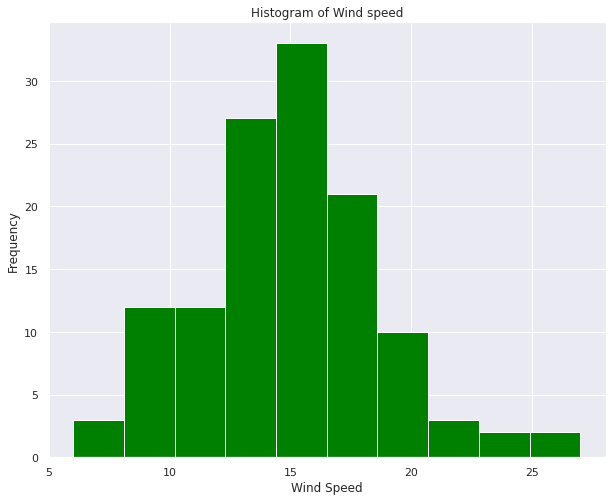

In [77]:
#histogram plot of the wind speed 
import matplotlib.pyplot as plt
df_subset.hist('sknt', color='green')
plt.title("Histogram of Wind speed")
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

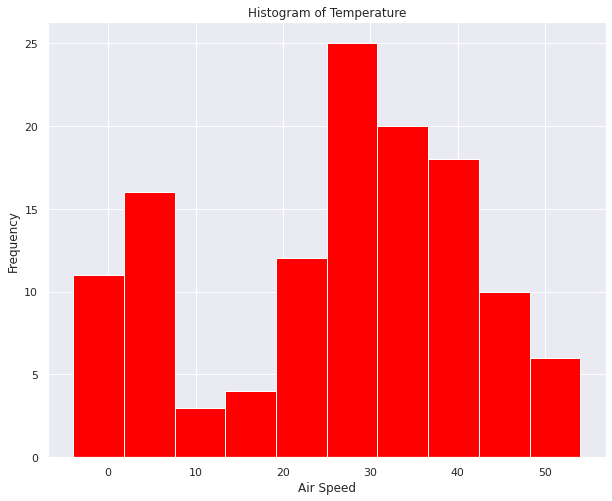

In [78]:
# a histogram plot of the temperature column
import matplotlib.pyplot as plt
df_subset.hist('tmpf', color='red')
plt.title("Histogram of Temperature")
plt.xlabel('Air Speed')
plt.ylabel('Frequency')

Text(0, 0.5, 'Wind Gust')

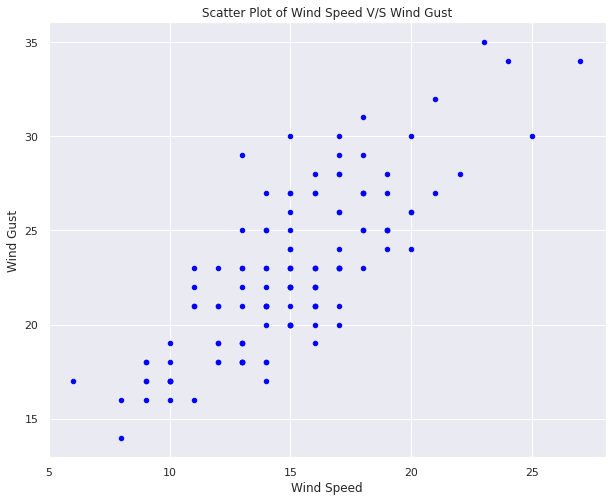

In [79]:
#a scatter plot of the wind speed V/S wind gust column
df_subset['gust'] = df_subset['gust'].astype(float)
df_subset.plot.scatter(x='sknt',
                      y='gust',
                      c='Blue')
plt.title("Scatter Plot of Wind Speed V/S Wind Gust")
plt.xlabel("Wind Speed")
plt.ylabel("Wind Gust")

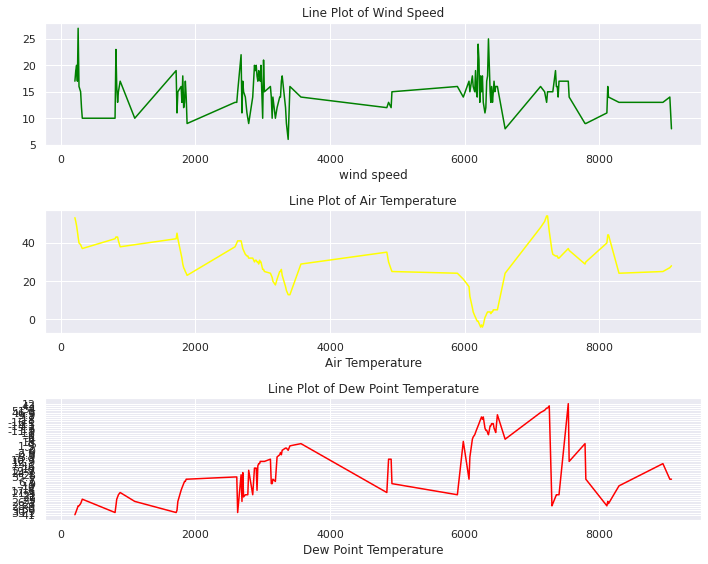

In [80]:
#Line plot of the sknt, tmpf and dwpf (as a 3 panel plot), each having a different color.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# specify dimensions of plot
sns.set(rc={'figure.figsize':(10,8)})

#3 rows and 1 columns
fig, ax = plt.subplots(3,1)

#line plot for Wind Speed
ax[0].plot(df_subset.sknt,color='green')
ax[0].set_title("Line Plot of Wind Speed")
ax[0].set_xlabel('wind speed')


#line plot for Air Temperature
ax[1].plot(df_subset.tmpf,color='yellow')
ax[1].set_title("Line Plot of Air Temperature")
ax[1].set_xlabel('Air Temperature')


#line plot for Dew Point Temperature
ax[2].plot(df_subset.dwpf,color='red')
ax[2].set_title("Line Plot of Dew Point Temperature")
ax[2].set_xlabel('Dew Point Temperature')

fig.tight_layout()
plt.show()

In [81]:
Y_aw = df_subset['gust']
X_aw = df_subset[['tmpf','dwpf','sknt','relh','drct','p01i','alti','mslp']]
X_aw[['dwpf','relh','drct','p01i','alti','mslp']]= X_aw[['dwpf','relh','drct','p01i','alti','mslp']].astype(float)
X_aw.dtypes

tmpf    float64
dwpf    float64
sknt    float64
relh    float64
drct    float64
p01i    float64
alti    float64
mslp    float64
dtype: object

# Polynomial Features

In [82]:
#	Create polynomial features (and interactions).
from sklearn.preprocessing import PolynomialFeatures

# specify the degree of the poly fit
# the higher the degree, the weirder the fit!
# includes INTERACTIONS and Polynomials... lots of variables here...
poly_features = PolynomialFeatures(degree=2)

# transforms the existing features to higher degree features.
X_poly = poly_features.fit_transform(X_aw)
X_poly = np.nan_to_num(X_poly)
tmp_trans = pd.DataFrame(X_poly)

print("Original Data")
print(X_aw.head()) #13 columns
print("##########################")
#tmp_trans= pd.DataFrame(np.nan_to_num(tmp_trans))
print("Poly Features")
print(tmp_trans.head()) #105 columns
tmp_trans.shape

Original Data
     tmpf  dwpf  sknt   relh   drct  p01i   alti    mslp
207  53.1  41.0  17.0  63.38  320.0   0.0  29.68  1005.2
220  51.1  33.1  19.0  49.98  310.0   0.0  29.74  1007.3
232  48.9  30.9  20.0  49.63  310.0   0.0  29.77  1008.1
244  46.0  30.0  17.0  53.37  330.0   0.0  29.81  1009.4
255  43.0  28.9  27.0  57.21  300.0   0.0  29.88  1011.9
##########################
Poly Features
    0     1     2     3      4   ...   40   41        42         43          44
0  1.0  53.1  41.0  17.0  63.38  ...  0.0  0.0  880.9024  29834.336  1010427.04
1  1.0  51.1  33.1  19.0  49.98  ...  0.0  0.0  884.4676  29957.102  1014653.29
2  1.0  48.9  30.9  20.0  49.63  ...  0.0  0.0  886.2529  30011.137  1016265.61
3  1.0  46.0  30.0  17.0  53.37  ...  0.0  0.0  888.6361  30090.214  1018888.36
4  1.0  43.0  28.9  27.0  57.21  ...  0.0  0.0  892.8144  30235.572  1023941.61

[5 rows x 45 columns]


(125, 45)

# Log Features

In [83]:
# Create log features
import numpy as np
tmp_log_a = np.log(X_aw)
tmp_log_a[np.isneginf(tmp_log_a)] = 0    #recode -inf to 0...
tmp_log = pd.DataFrame(tmp_log_a)
tmp_log = tmp_log.fillna(0)
print(tmp_log.shape) # same number of columns, but they've changed.
tmp_log

(125, 8)


,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp
207,3.972177,3.713572,2.833213,4.149148,5.768321,0.0,3.390473,6.912942
220,3.933784,3.499533,2.944439,3.911623,5.736572,0.0,3.392493,6.915029
232,3.889777,3.430756,2.995732,3.904595,5.736572,0.0,3.393501,6.915823
244,3.828641,3.401197,2.833213,3.977249,5.799093,0.0,3.394844,6.917111
255,3.761200,3.363842,3.295837,4.046729,5.703782,0.0,3.397189,6.919585
...,...,...,...,...,...,...,...,...
8141,3.786460,3.295837,2.639057,3.926517,5.247024,0.0,3.397858,6.920375
8297,3.182212,2.302585,2.564949,3.995629,5.828946,0.0,3.403195,6.925595
8950,3.218876,2.714695,2.564949,4.183271,5.799093,0.0,3.394508,6.917210
9053,3.295837,1.945910,2.639057,3.740285,5.438079,0.0,3.393501,6.916021


# Concatenate log and polynomial features

In [84]:
# smoosh the two dataframes together
# reset index of tables
#X_aw.reset_index(inplace=True,drop=True)   #drop not to make additional column for index
tmp_trans.reset_index(inplace=True,drop=True)
tmp_log.reset_index(inplace=True,drop=True)

#Join these two datasets together with the original variables.
df_resultant = pd.concat([tmp_trans,tmp_log], axis=1)

# look at how many more columns there are
df_resultant.shape

(125, 53)

In [85]:
#check missing values
df_resultant
missing_values = df_resultant.isnull().sum(axis=0)
missing_values


0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
tmpf    0
dwpf    0
sknt    0
relh    0
drct    0
p01i    0
alti    0
mslp    0
dtype: int64

In [86]:
# Shuffle the data, then do an 80/20 split on the data
Y_aw.reset_index(inplace=True,drop=True)
X_train ,X_test, y_train, y_test = train_test_split(df_resultant, Y_aw, test_size=0.2, random_state=31, shuffle=True)

# ensure the split worked - checked how many rows there are!
print('X_train', X_train.shape,'y_train', y_train.shape)
print('X_test ', X_test.shape, 'y_test ', y_test.shape)

X_train (100, 53) y_train (100,)
X_test  (25, 53) y_test  (25,)


# Linear Regression

In [87]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# fit the training data to Linear Regression
LR_model = LinearRegression() # specifies an empty model
LR_model.fit(X_train, y_train)
# predicting on training data-set
y_train_predict = LR_model.predict(X_train)
# predicting on test data-set
y_test_predict = LR_model.predict(X_test)
df_linear_reg_pred = pd.DataFrame(y_test_predict)
df_linear_reg_pred

# the Linear regression model results   
score_test = LR_model.score(X_test, y_test)
mae_test = mean_absolute_error(y_test,y_test_predict)
print("R2:{0:.4f}, MAE:{1:.2f}".format(score_test, mae_test))

R2:-0.2335, MAE:3.38


# Lasso Regression

In [88]:
#Fitting an lasso on your concatenated dataset (the polynomial features and 
#interactions, and the log features) 
#with varying alpha values (0.01, 0.1, 1, 10, 100, 1000), 
#observing model best fit in terms of R2 and MAE
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

df_model_results = []

alphas = [0.01, 0.1, 1, 10, 100, 1000]        # this is essentially alpha values

# the Lasso on Training data set 
for a in alphas:
  model = Lasso(alpha=a).fit(X_train, y_train)   
  score_train = model.score(X_train, y_train)
  pred_y = model.predict(X_train)
  mae = mean_absolute_error(y_train,pred_y)

# the Lasso on Test data set    
  score_test = model.score(X_test, y_test)
  pred_y_test = model.predict(X_test)
  mae_test = mean_absolute_error(y_test,pred_y_test)

#Show results in a table for training and validation results.
  df_model_results.append([a, score_train, score_test, mae, mae_test])
df_model_results = pd.DataFrame(data=df_model_results, columns=['Alpha', 'Training R2', 'Test R2', 'Training MAE', 'Test MAE'])
print(df_model_results)

     Alpha  Training R2   Test R2  Training MAE  Test MAE
0     0.01     0.708028  0.738219      1.876754  1.630231
1     0.10     0.702573  0.747352      1.912473  1.628341
2     1.00     0.698641  0.748369      1.921989  1.615872
3    10.00     0.690043  0.758812      1.973353  1.573544
4   100.00     0.659944  0.756681      2.110637  1.479246
5  1000.00     0.622187  0.703419      2.245159  1.758379


# Ridge Regression

In [89]:
#Fitting an ridge on your concatenated dataset (the polynomial features and 
#interactions, and the log features) 
#with varying alpha values (0.01, 0.1, 1, 10, 100, 1000), 
#observing model best fit in terms of R2 and MAE
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

df_model_results = []

alphas = [0.01, 0.1, 1, 10, 100, 1000]        # this is essentially alpha values

# the ridge on Training data set 
for a in alphas:
  model = Lasso(alpha=a).fit(X_train, y_train)   
  score_train = model.score(X_train, y_train)
  pred_y = model.predict(X_train)
  mae = mean_absolute_error(y_train,pred_y)

# the Lasso on Test data set    
  score_test = model.score(X_test, y_test)
  pred_y_test = model.predict(X_test)
  mae_test = mean_absolute_error(y_test,pred_y_test)

#Show results in a table for training and validation results.
  df_model_results.append([a, score_train, score_test, mae, mae_test])
df_model_results = pd.DataFrame(data=df_model_results, columns=['Alpha', 'Training R2', 'Test R2', 'Training MAE', 'Test MAE'])
print(df_model_results)

     Alpha  Training R2   Test R2  Training MAE  Test MAE
0     0.01     0.708028  0.738219      1.876754  1.630231
1     0.10     0.702573  0.747352      1.912473  1.628341
2     1.00     0.698641  0.748369      1.921989  1.615872
3    10.00     0.690043  0.758812      1.973353  1.573544
4   100.00     0.659944  0.756681      2.110637  1.479246
5  1000.00     0.622187  0.703419      2.245159  1.758379


# ElasticNet Regression

In [90]:
#Fitting an elasticNet on your concatenated dataset (the polynomial features and 
#interactions, and the log features) 
#with varying alpha values (0.01, 0.1, 1, 10, 100, 1000), observing model best fit in terms of R2 and MAE
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error

df_model_results = []

alphas = [0.01, 0.1, 1, 10, 100, 1000]        # this is essentially alpha values

# the ElasticNet on Training data set 
for a in alphas:
  model = ElasticNet(alpha=a).fit(X_train, y_train)   
  score_train = model.score(X_train, y_train)
  pred_y = model.predict(X_train)
  mae = mean_absolute_error(y_train,pred_y)

# the ElasticNet on Test data set    
  score_test = model.score(X_test, y_test)
  pred_y_test = model.predict(X_test)
  mae_test = mean_absolute_error(y_test,pred_y_test)

#Show results in a table for training and validation results.
  df_model_results.append([a, score_train, score_test, mae, mae_test])
df_model_results = pd.DataFrame(data=df_model_results, columns=['Alpha', 'Training R2', 'Test R2', 'Training MAE', 'Test MAE'])
print(df_model_results)

     Alpha  Training R2   Test R2  Training MAE  Test MAE
0     0.01     0.707933  0.737560      1.877783  1.630985
1     0.10     0.702803  0.747741      1.911686  1.626407
2     1.00     0.699798  0.746914      1.916014  1.623505
3    10.00     0.692084  0.754303      1.957291  1.586926
4   100.00     0.676581  0.775164      2.033666  1.464900
5  1000.00     0.626251  0.693646      2.235905  1.776960


Text(0, 0.5, 'Predicted')

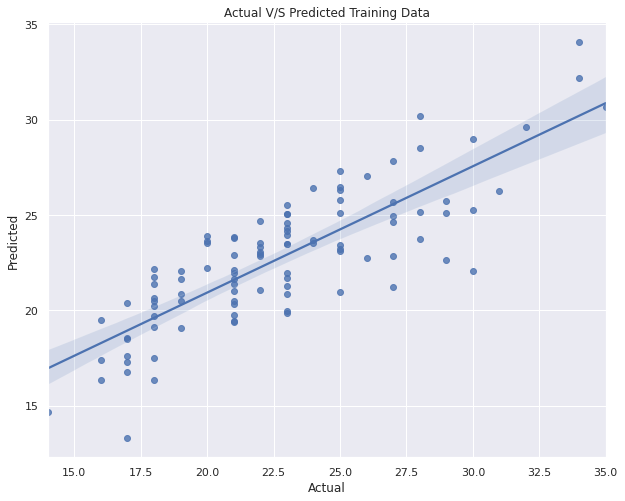

In [91]:
#Scatterplot of actual vs. predicted for your best fitting model.
import seaborn  
model = ElasticNet(alpha=100.00).fit(X_train, y_train)   
score_train = model.score(X_train, y_train)
pred_y = model.predict(X_train)
seaborn.regplot(y_train,pred_y)
plt.title("Actual V/S Predicted Training Data")
plt.xlabel("Actual")
plt.ylabel("Predicted")

Text(0, 0.5, 'Test')

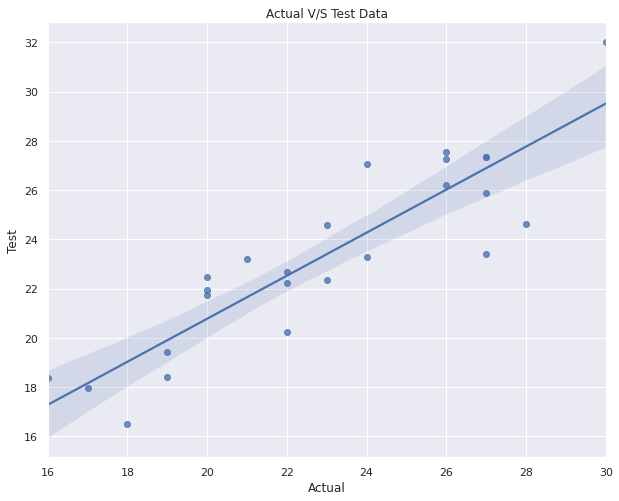

In [92]:
#Scatterplot of actual vs. test for your best fitting model.
score_test = model.score(X_test, y_test)
pred_y_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test,pred_y_test)
seaborn.regplot(y_test,pred_y_test)
plt.title("Actual V/S Test Data")
plt.xlabel("Actual")
plt.ylabel("Test")

# Baseline ElsticNet Regression

In [93]:
#After doing the same on the smaller original dataset it was observed that
#all the feature engineering helped enhance model accuracy
X_aw.reset_index(inplace=True,drop=True)   #drop not to make additional column for index
X_train_subset ,X_test_subset, Y_train_subset, Y_test_subset = train_test_split(X_aw, Y_aw, test_size=0.2, random_state=31)

# ensure the split worked - checked how many rows there are!
print('X_train', X_train_subset.shape,'y_train', Y_train_subset.shape)
print('X_test ', X_test_subset.shape, 'y_test ', X_test_subset.shape)


X_train (100, 8) y_train (100,)
X_test  (25, 8) y_test  (25, 8)


In [94]:
alphas = [0.01, 0.1, 1, 10, 100, 1000]       

df_model_results_s = []

# the ElasticNet on original dataset
# training dataset
for a in alphas:
  model = ElasticNet(alpha=a).fit(X_train_subset, Y_train_subset)   
  score_train = model.score(X_train_subset, Y_train_subset)
  pred_y_simple_train = model.predict(X_train_subset)
  mae = mean_absolute_error(Y_train_subset,pred_y_simple_train)
  score_test = model.score(X_test_subset, Y_test_subset)
  pred_y_simple_test = model.predict(X_test_subset)
  mae_test = mean_absolute_error(Y_test_subset,pred_y_simple_test)

  
#Show results in a table for training and validation results.
  df_model_results_s.append([a, score_train, score_test, mae, mae_test])
df_model_results_s = pd.DataFrame(data=df_model_results_s, columns=['Alpha', 'Training R2', 'Test R2', 'Training MAE', 'Test MAE'])
print(df_model_results_s)

     Alpha  Training R2   Test R2  Training MAE  Test MAE
0     0.01     0.640694  0.672966      2.201683  1.804642
1     0.10     0.638061  0.680525      2.202587  1.793387
2     1.00     0.623941  0.702218      2.240013  1.760866
3    10.00     0.413763  0.525454      2.701517  2.230617
4   100.00     0.000000 -0.003528      3.480000  3.170400
5  1000.00     0.000000 -0.003528      3.480000  3.170400
